In [1]:
import numpy as np
import matplotlib.pyplot as plt
%cd code/
from main import main

C:\Users\jackj\school\fall2024\orie4580\gender-bias-analysis\code


In [2]:
def visualize_path_percentage(path, identities, num_levels):
    times = [entry[0] for entry in path]
    states = [entry[1] for entry in path]
    
    # Prepare data for plotting percentages
    percentages = {identity: [] for identity in identities}
    for state in states:
        total_employees = sum(
            sum(state.get_count(level, identity) for identity in identities) for level in range(num_levels)
        )
        for identity in identities:
            total_identity_count = sum(state.get_count(level, identity) for level in range(num_levels))
            percentages[identity].append(total_identity_count / total_employees)
    
    # Prepare cumulative percentages for filling
    cumulative_percentages = np.zeros(len(times))
    
    # Create the plot
    plt.figure(figsize=(12, 8))
    
    for identity in identities:
        identity_percentages = np.array(percentages[identity])
        plt.step(times, cumulative_percentages + identity_percentages, where="post", label=f"{identity}")
        plt.fill_between(times, cumulative_percentages, cumulative_percentages + identity_percentages, step="post", alpha=0.7)
        cumulative_percentages += identity_percentages
    
    plt.xlim(0, times[-1])
    plt.ylim(0, 1)
    
    # Add labels and legend
    plt.xlabel("Time")
    plt.ylabel("Percentage of Employees")
    plt.title("Overall Employee Identity Distribution Over Time")
    plt.legend(title="Identities", loc="upper right")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.tight_layout()
    
    plt.show()

def visualize_path_percentage_by_level(path, identities, num_levels):
    """
    Visualizes the state throughout the path as a step graph with filled regions
    for each level individually.

    Parameters:
        path (list of tuples): A list where each element is a tuple (time, state),
                               with state being a SimpleWorkplaceState.
        identities (list): List of identities (e.g., ["F", "M"]).
        levels (list): List of levels (e.g., ["0", "1", "2"]).
    """
    times = [entry[0] for entry in path]
    states = [entry[1] for entry in path]  # Each state is a SimpleWorkplaceState
    
    # Create a plot for each level
    for level in range(num_levels):
        # Prepare data for plotting percentages at the current level
        percentages = {identity: [] for identity in identities}
        for state in states:
            total_employees_at_level = sum(state.get_count(level, identity) for identity in identities)
            for identity in identities:
                identity_count = state.get_count(level, identity)
                if total_employees_at_level > 0:
                    percentages[identity].append(identity_count / total_employees_at_level)
                else:
                    percentages[identity].append(0)  # Avoid division by zero
        
        # Prepare cumulative percentages for filling
        cumulative_percentages = np.zeros(len(times))
        
        # Create the plot for this level
        plt.figure(figsize=(12, 8))
        for identity in identities:
            identity_percentages = np.array(percentages[identity])
            plt.step(times, cumulative_percentages + identity_percentages, where="post", label=f"{identity}")
            plt.fill_between(times, cumulative_percentages, cumulative_percentages + identity_percentages, step="post", alpha=0.7)
            cumulative_percentages += identity_percentages
        
        # Customize the plot for this level
        plt.xlim(0, times[-1])
        plt.ylim(0, 1)
        plt.xlabel("Time")
        plt.ylabel("Percentage of Employees")
        plt.title(f"Employee Identity Distribution Over Time at Level {level}")
        plt.legend(title="Identities", loc="upper right")
        plt.grid(True, which="both", linestyle="--", linewidth=0.5)
        plt.tight_layout()
        plt.show()


In [3]:
identities=["M", "F"]
num_levels=4
path, model = main(100)

Simulation time: 10.01
Simulation time: 20.03
Simulation time: 30.12
Simulation time: 40.15
Simulation time: 50.17
Simulation time: 60.20
Simulation time: 70.28
Simulation time: 80.28
Simulation time: 90.28


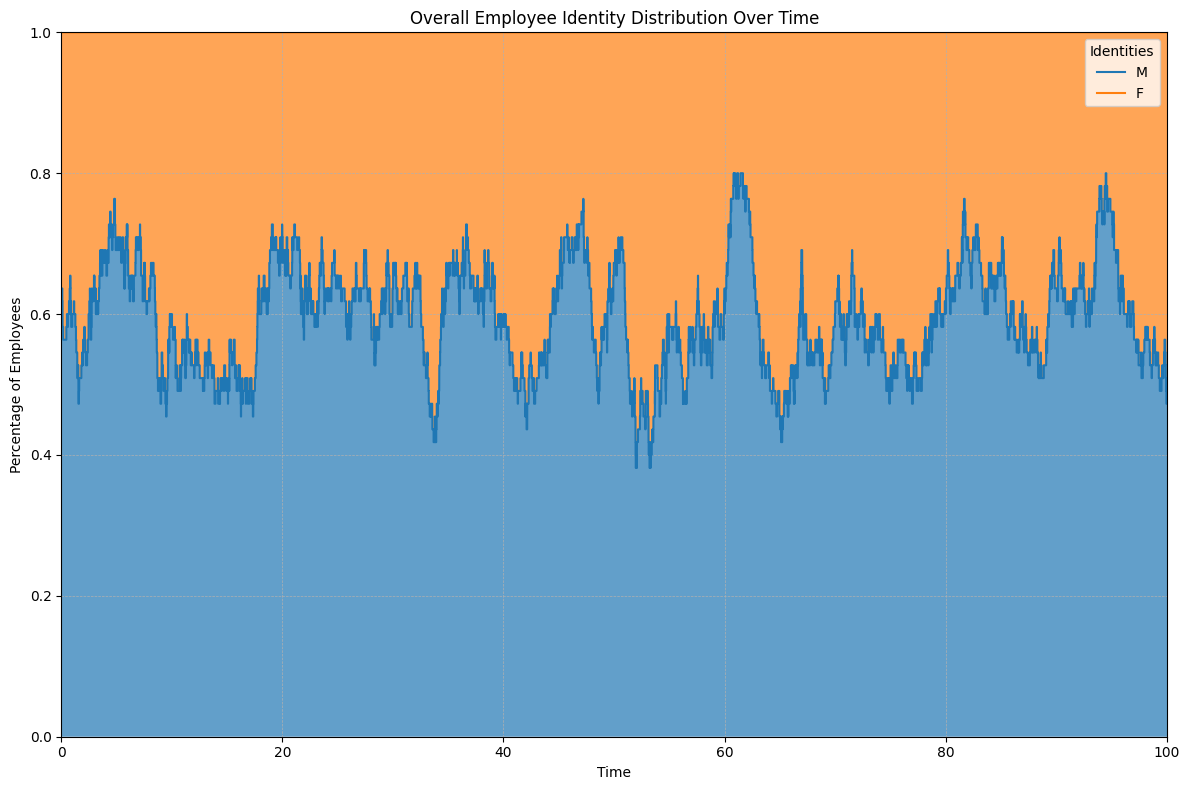

In [4]:
visualize_path_percentage(path, identities, num_levels)

In [6]:
len(path)

430